In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.utils import shuffle
import csv
import cv2
import itertools
import numpy as np
import pandas as pd
import os
import sys
import tempfile
import tqdm

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import tensorflow_addons as tfa
%matplotlib inline

In [49]:
def load_pose_landmarks(csv_path):
    """Loads a CSV created by MoveNetPreprocessor.
    Returns:
        X: Detected landmark coordinates and scores of shape (N, 17 * 3)
        y: Ground truth labels of shape (N, label_count)
        classes: The list of all class names found in the dataset
        dataframe: The CSV loaded as a Pandas dataframe features (X) and ground
        truth labels (y) to use later to train a pose classification model.
    """

    # Load the CSV file
    dataframe = pd.read_csv(csv_path)
    
    labels = dataframe["label"] - 1#pd.read_csv(labels_path, header=None)
    
    print(labels.unique())
    df_to_process = dataframe.copy()

    # Drop the file_name columns as you don't need it during training.
    df_to_process.drop(columns=['file_name'], inplace=True)

    # Extract the list of class names
    df_to_process.pop('class_name')
    df_to_process.pop('class_no')
    df_to_process.pop('label')

    # Extract the labels
    y = labels
    classes = range(6)

    # Convert the input features and labels into the correct format for training.
    X = df_to_process.astype('float64')
    y = keras.utils.to_categorical(y)

    return X, y, classes, dataframe

In [50]:
# Read labels file

data_path = '/home/shellygoel2324/data_merged.csv'

# Load the train data
X, y, class_names, _ = load_pose_landmarks(data_path)

print(X.shape, y.shape)

y = np.argmax(y, 1)

# Split training data (X, y) into (X_train, y_train) and (X_val, y_val)

# 80/10/10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1) # 0.25 x 0.8 = 0.2

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

#60/20/20
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

[0. 3. 1. 2. 4. 5.]
(12056, 51) (12056, 6)
(9644, 51) (1206, 51) (1206, 51)
(9644,) (1206,) (1206,)


In [51]:
print("TRAIN DISTRIBUTION")

sample_dist = []
for i in range(0,6):
    
    num_i = 0
    for sample in y_train:
            if sample == i:
                num_i+=1
    dist = num_i/len(y_train)
    print(f"{i}: {dist}")
    sample_dist.append(dist)


print("\nTEST DISTRIBUTION")
for i in range(0,6):
    
    num_i = 0
    for sample in y_test:
            if sample == i:
                num_i+=1

    dist = num_i/len(y_test)
    print(f"{i}: {dist}")
    #sample_dist.append(dist)

TRAIN DISTRIBUTION
0: 0.5412691829116549
1: 0.25964330153463294
2: 0.11406055578598093
3: 0.047698050601410205
4: 0.02789299046038988
5: 0.009435918705931148

TEST DISTRIBUTION
0: 0.5655058043117744
1: 0.2462686567164179
2: 0.11525704809286899
3: 0.0472636815920398
4: 0.02155887230514096
5: 0.0041459369817578775


In [52]:

logreg = LogisticRegression(max_iter = 200,solver = 'sag', verbose = 1)
logreg.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


e: 0.00199877
Epoch 177, change: 0.00198791
Epoch 178, change: 0.00197940
Epoch 179, change: 0.00197817
Epoch 180, change: 0.00196501
Epoch 181, change: 0.00195848
Epoch 182, change: 0.00195523
Epoch 183, change: 0.00194118
Epoch 184, change: 0.00193573
Epoch 185, change: 0.00193190
Epoch 186, change: 0.00192270
Epoch 187, change: 0.00191576
Epoch 188, change: 0.00191368
Epoch 189, change: 0.00189891
Epoch 190, change: 0.00189491
Epoch 191, change: 0.00188893
Epoch 192, change: 0.00187894
Epoch 193, change: 0.00187669
Epoch 194, change: 0.00186495
Epoch 195, change: 0.00185882
Epoch 196, change: 0.00185494
Epoch 197, change: 0.00184563
Epoch 198, change: 0.00184126
Epoch 199, change: 0.00183474
Epoch 200, change: 0.00182583
Epoch 1, change: 1.00000000
Epoch 2, change: 0.22324108
Epoch 3, change: 0.20942438
Epoch 4, change: 0.12261100
Epoch 5, change: 0.10182234
Epoch 6, change: 0.09484249
Epoch 7, change: 0.07119714
Epoch 8, change: 0.05777404
Epoch 9, change: 0.04450525
Epoch 10, chan

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished


LogisticRegression(max_iter=200, solver='sag', verbose=1)

In [53]:
prediction = logreg.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       682
           1       0.80      0.90      0.84       297
           2       0.81      0.62      0.70       139
           3       0.55      0.21      0.30        57
           4       0.79      0.73      0.76        26
           5       0.00      0.00      0.00         5

    accuracy                           0.87      1206
   macro avg       0.65      0.57      0.59      1206
weighted avg       0.86      0.87      0.86      1206



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
score = logreg.score(X_test, y_test)
print(score)

0.8714759535655058


Feature: 0, Score: 0.01481
Feature: 1, Score: -0.01884
Feature: 2, Score: -0.00976
Feature: 3, Score: 0.00403
Feature: 4, Score: 0.02242
Feature: 5, Score: -0.01261
Feature: 6, Score: 0.01446
Feature: 7, Score: -0.00175
Feature: 8, Score: -0.01338
Feature: 9, Score: 0.00596
Feature: 10, Score: -0.02831
Feature: 11, Score: -0.01556
Feature: 12, Score: 0.00110
Feature: 13, Score: -0.08525
Feature: 14, Score: -0.01630
Feature: 15, Score: -0.00900
Feature: 16, Score: -0.02572
Feature: 17, Score: -0.01175
Feature: 18, Score: -0.03106
Feature: 19, Score: -0.06608
Feature: 20, Score: -0.01212
Feature: 21, Score: -0.04702
Feature: 22, Score: -0.05660
Feature: 23, Score: -0.00735
Feature: 24, Score: 0.05845
Feature: 25, Score: -0.06083
Feature: 26, Score: -0.01259
Feature: 27, Score: 0.04585
Feature: 28, Score: 0.04793
Feature: 29, Score: -0.00731
Feature: 30, Score: -0.04075
Feature: 31, Score: 0.04138
Feature: 32, Score: -0.01339
Feature: 33, Score: -0.04003
Feature: 34, Score: 0.09272
Featur

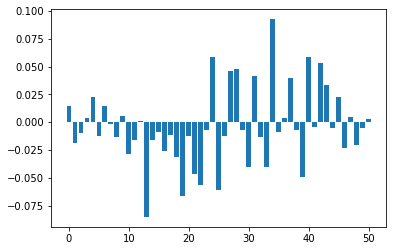

In [56]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
importance = logreg.coef_[0]

for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

Normalized confusion matrix


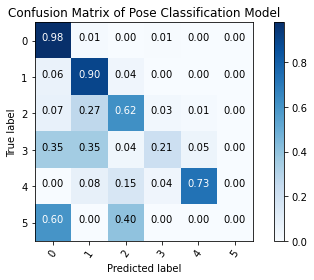

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Plots the confusion matrix."""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm,
                      class_names,normalize=True,
                      title ='Confusion Matrix of Pose Classification Model')


In [58]:
from io import StringIO

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = LogisticRegression(max_iter = 1000,solver = 'sag')
clf.fit(X_train,y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.savefig("pure_LogRes.png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.close()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
